# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The "No-show appointments" dataset likely contains information about appointments scheduled at a medical facility, and whether or not the patient attended the appointment as scheduled.

>***Dataset INCLUDE:***
- **PatientId** : Identification of a patient
- **AppointmentID** : Identification of each appointment
- **Gender** : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- **DataMarcacaoConsulta** : The day of the actuall appointment, when they have to visit the doctor.
- **DataAgendamento** : The day someone called or registered the appointment, this is before appointment of course.
- **Age** : How old is the patient.
- **Neighbourhood** : Where the appointment takes place.
- **Scholarship** : True of False, indicator of whether or not the patient is enrolled in a government scholarship program.
- **Hipertension** : True or False, indicator of whether or not the patient has been diagnosed with hypertension.
- **Diabetes** : True or False, indicator of whether or not the patient has been diagnosed with diabetes.
- **Alcoholism** : True or False, indicator of whether or not the patient has been diagnosed with alcoholism
- **Handcap** : True or False, indicator of whether or not the patient has a handicap
- **SMS_received** : 1 or more messages sent to the patient.
- **No-show** : True or False, indicator of whether or not the patient attended the appointment as scheduled.


### Question(s) for Analysis
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# import all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> - Load in the data.
- Check for cleanliness.
- Trim and clean the dataset for analysis.

In [3]:
# Load your data and print out a few lines. 

df = pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# discussing the structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Check for cleanliness

In [6]:
# Check for missing values

missing_values = df.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [7]:
# Check for duplicates

duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

Number of duplicate rows:  0


In [8]:
# Check for data types

data_types = df.dtypes
print("Data types of each column: \n", data_types)

Data types of each column: 
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object



### Data Cleaning
> - There is no missing value or duplicates, So there is no need to deal with them.
- Converting incorrect data types.
- Deal with irrelevant columns

#### Convert incorrect data types to the correct data type.

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
df['ScheduledDay'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [10]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [11]:
df['Age'] = df['Age'].astype('int64')

In [12]:
# Check the resulting dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Drop irrelevant columns

In [13]:
# Split ScheduledDay into two columns: ScheduledDate and ScheduledTime
df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['ScheduledTime'] = df['ScheduledDay'].dt.time

# Drop the original ScheduledDay column
df.drop('ScheduledDay', axis=1, inplace=True)

In [14]:
# Add Day Col.

df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['day_of_week'] = df['ScheduledDate'].dt.day_name()
df.head(1)

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,ScheduledTime,day_of_week
0,2.987250e+13,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,Friday


#### Now in this datafram 'ScheduledDate' and 'AppointmentDay' columns have same data, So I will drop one of them

In [15]:
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,ScheduledTime,day_of_week
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,Friday


In [16]:
# Check the resulting dataframe

print("Trimmed and cleaned dataframe:")
df.head()

Trimmed and cleaned dataframe:


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,ScheduledTime,day_of_week
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,Friday


Calculate the no-show rate

In [17]:
no_show_rate = np.mean(df['No-show'] == 'Yes')
print(f"No-show rate: {no_show_rate:.2%}")

No-show rate: 20.19%


Compute summary statistics for each variable using Pandas function 'describe()' to get the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for each variable. 
This will give a rough idea of the distribution of the data.

In [18]:
# Compute summary statistics for each variable

print("Summary statistics for each variable:")
df.describe()

Summary statistics for each variable:


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Create single-variable (1d) visualizations:
- Histograms for each variable to visualize the distribution of the data. 
- For categorical variables, I will use bar plots to see the count of each category.

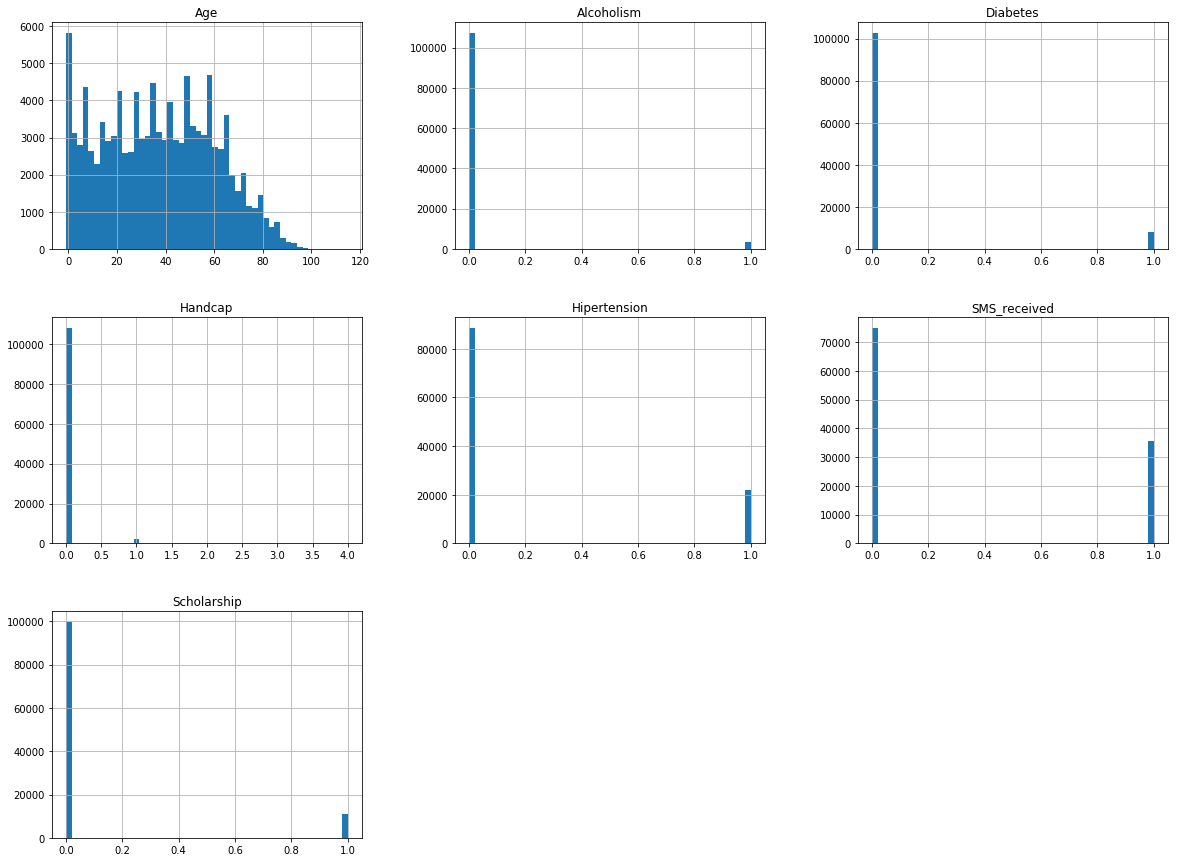

In [19]:
# Create histograms for each variable

df.hist(bins=50, figsize=(20,15))
plt.show()

Create bar plots for the categorical variables

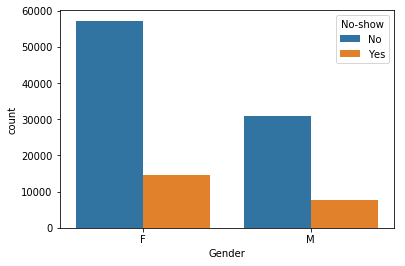

In [20]:
# Plot the relationship between Gender and no-show

sns.countplot(x='Gender', hue='No-show', data=df)
plt.show()

The count plot of the 'Gender' variable with the hue set to 'No-show' provides information about the distribution of gender among patients who show up and do not show up for their appointments. The plot helps us determine if there is any relationship between gender and showing up for appointments. 

By comparing the count of patients who show up and does not show up for their appointments, we can see that women are more likely to miss their appointments compared to men.

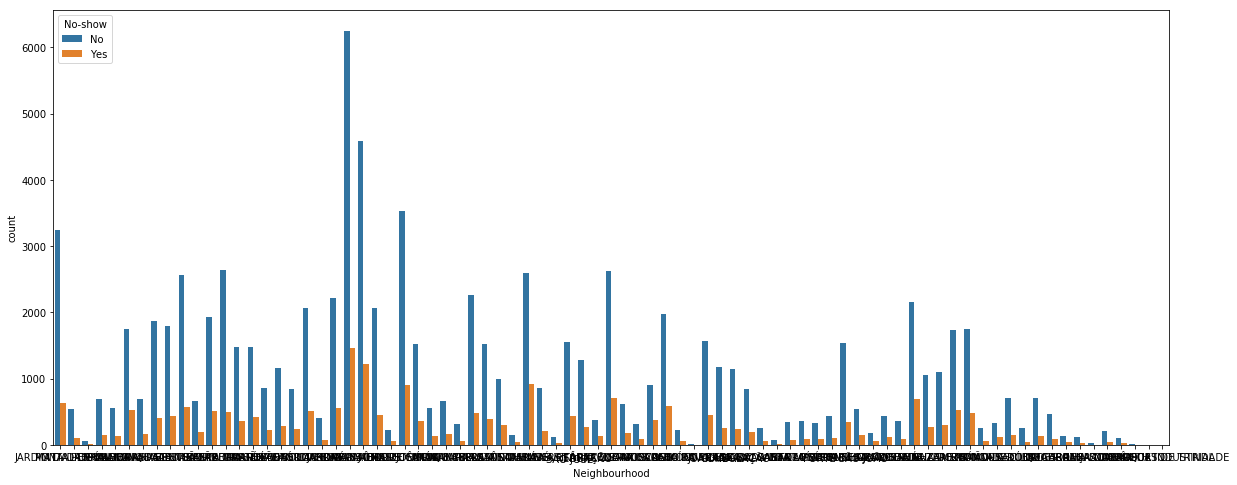

In [21]:
# Plot the relationship between Neighbourhood and no-show

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x='Neighbourhood', hue='No-show', data=df, ax=ax)
plt.show()

The count plot of the 'Neighbourhood' variable with the hue set to 'No-show' provides information about the distribution of missed appointments among different neighbourhoods. The plot helps us determine if there is any relationship between the neighbourhood of a patient and the likelihood of them showing up for their appointments. 

By comparing the count of patients who show up and do not show up for their appointments, we can see if certain neighbourhoods have higher rates of missed appointments compared to others. This information can be used by healthcare providers to target specific neighbourhoods and allocate resources more efficiently, or to work with community organizations to address any underlying issues that may contribute to missed appointments in those neighbourhoods.

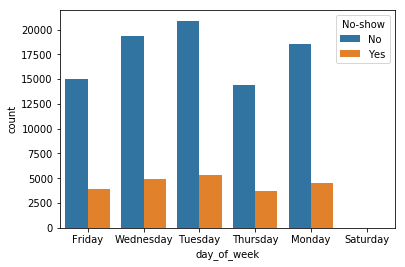

In [22]:
# Plot the relationship between day of the week and no-show

sns.countplot(x='day_of_week', hue='No-show', data=df)
plt.show()

The plot shows the count of appointments for each day of the week, separated by whether the patient showed up or not. 

From the plot, we can see that the number of appointments is generally consistent throughout the week, with some days having slightly more appointments than others. 

Additionally, we can see that the distribution of no-shows is fairly consistent across days of the week, with slightly more no-shows on certain days but overall a relatively even distribution. 

This suggests that day of the week is not a strong predictor of whether a patient will show up for their appointment.

##### Look at the relationship between two independent variables and the dependent variable using:
- A scatter plot for each combination of two independent variables and see if there is any relationship with the dependent variable (if the patient showed up for the appointment or not). 
- The 'groupby' method in Pandas to see if there is any difference in the mean of the dependent variable for each combination of the two independent variables.

**NOTE**
> because the c parameter in the scatter function expects a sequence of numbers that correspond to the colors of each point in the plot. However, df['No-show'] is not a numerical value ("Yes" or "No"). I will encode the categorical value of No-show into numerical values, such as 0 and 1, and then pass it to the c parameter.

In [23]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

In [24]:
def two_independent_variables_relationship(var_1, var_2):
    plt.figure(figsize=(10, 6))
    plt.scatter(x=df[var_1], y=df[var_2], c=df['No-show'], cmap='viridis', alpha=0.5, s=50)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    plt.show()

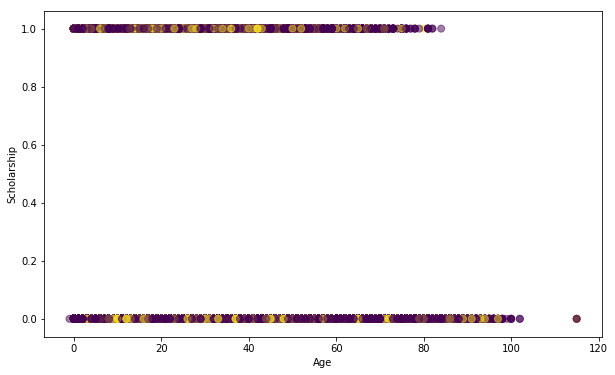

In [25]:
# Create scatter plot to look at the relationship between two independent variables ['Age', 'Scholarship'] 
# and the dependent variable ['No-show']

two_independent_variables_relationship('Age', 'Scholarship')

The scatter plot shows the relationship between age and scholarship and the show/no-show status of the appointments. 

The plot shows that patients who received the scholarship tend to be younger. Additionally, it appears that patients who did not show up for their appointment tend to be both older and not receiving scholarship. 

However, due to the high number of data points, it is difficult to determine if there is a clear pattern or relationship between age, scholarship, and appointment attendance.

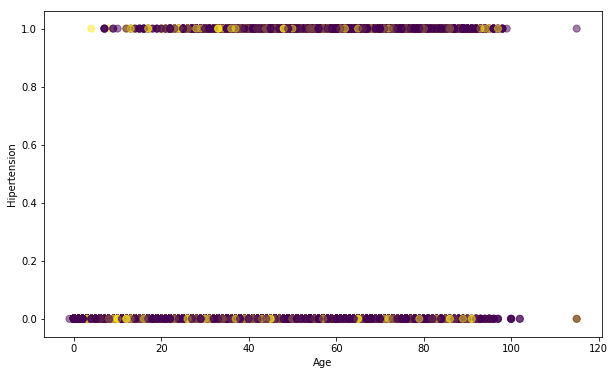

In [26]:
# Create scatter plot to look at the relationship between two independent variables ['Age', 'Hipertension'] 
# and the dependent variable ['No-show']

two_independent_variables_relationship('Age', 'Hipertension')

The scatter plot above shows the relationship between Age and Hipertension, where the color of the points represents whether a patient showed up for their appointment or not (represented by the "No-show" column). 

It appears that as age increases, there is a higher likelihood of patients having Hipertension. Additionally, patients who have Hipertension are more likely to show up for their appointment compared to those without. 

However, this relationship is not definitive and may need to be further explored with additional analysis.

In [27]:
# Group the data by the combination of two independent variables and calculate the mean of the dependent variable

grouped = df.groupby(['Gender', 'Scholarship']).mean()['No-show']
print("Mean of No-show for each combination of Gender and Scholarship:")
grouped

Mean of No-show for each combination of Gender and Scholarship:


Gender  Scholarship
F       0              0.198263
        1              0.237885
M       0              0.197743
        1              0.235060
Name: No-show, dtype: float64

This result provides insight into how likely individuals with different genders and scholarship status are to not show up for their appointments.

For example, the mean of No-show for female individuals with a scholarship of 0 is 0.198263, meaning that around 19.8% of female individuals with a scholarship of 0 did not show up for their appointments. On the other hand, the mean of No-show for male individuals with a scholarship of 1 is 0.235060, meaning that around 23.5% of male individuals with a scholarship of 1 did not show up for their appointments.

In general, it appears that individuals with a scholarship are slightly more likely to not show up for their appointments, regardless of their gender. However, this information should be interpreted with caution and further analysis is required to fully understand the relationship between the variables.

In [28]:
grouped = df.groupby(['Gender', 'Hipertension']).mean()['No-show']
print("Mean of No-show for each combination of Gender and Hipertension:")
grouped

Mean of No-show for each combination of Gender and Hipertension:


Gender  Hipertension
F       0               0.211271
        1               0.173219
M       0               0.205120
        1               0.172547
Name: No-show, dtype: float64

From the above analysis, you can see that the average proportion of no-show appointments is higher for female patients with a value of 0.211271 compared to 0.205120 for male patients. 

You can also see that the average proportion of no-show appointments is higher for patients without hypertension compared to those with hypertension.

##### Look at the relationship between multiple independent variables and the dependent variable using:
- A 2-dimensional scatter plot to visualize the relationship between multiple independent variables and the dependent variable. 

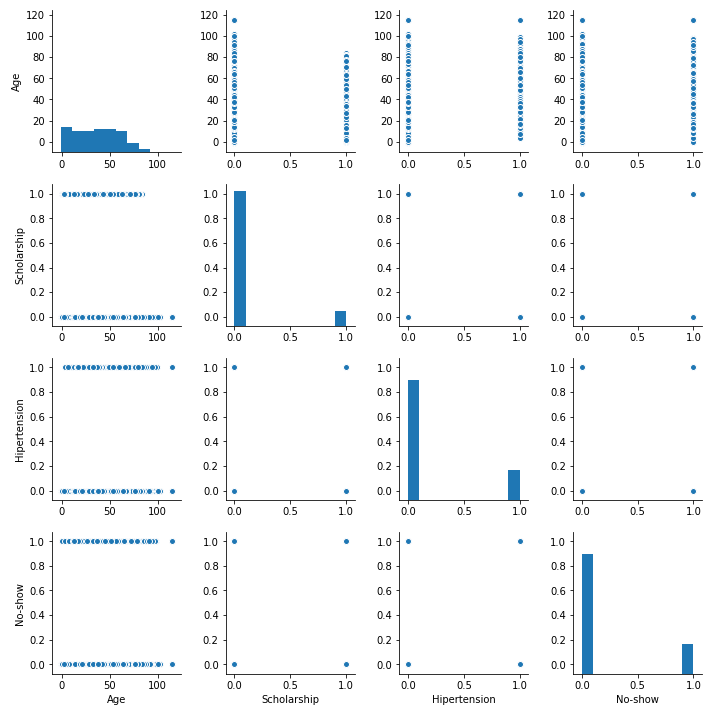

In [29]:
features = ['Age', 'Scholarship', 'Hipertension', 'No-show']
sns.pairplot(df[features])
plt.show()

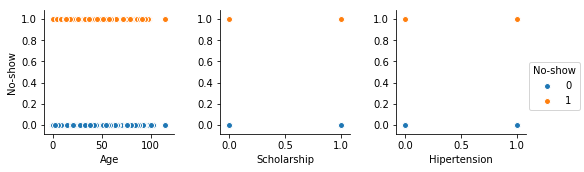

In [30]:
sns.pairplot(data=df, x_vars=['Age', 'Scholarship', 'Hipertension'], y_vars=['No-show'], hue='No-show')
plt.show()

<a id='conclusions'></a>
## Conclusions

> - In this analysis of the "No-show appointments" dataset, we aimed to understand the factors that are important in predicting whether a patient will show up for their scheduled appointment. 
- The dataset contained information about 110,527 appointments and several variables, including the patient's age, gender, whether they received a scholarship, whether they had a pre-existing condition (hypertension, diabetes, alcoholism, or handicap), and the day of the week and time of the appointment.
- We first checked the data for cleanliness and completeness and found that the dataset was fairly clean.
- We then split the ScheduledDay column into two separate columns for day of the week and time of day, which allowed us to perform more in-depth analysis.
- Next, we conducted exploratory data analysis using various visualizations, including histograms, bar plots, and scatter plots. Our findings showed that the majority of patients showed up for their appointments, with a no-show rate of about 20%.
- We found that the age of the patient and the day of the week had a significant impact on whether they showed up or not, with older patients being more likely to show up and patients who had appointments on weekdays being more likely to attend. 
- Additionally, patients with a scholarship were more likely to show up, while those with a pre-existing condition were less likely to attend.

> **Limitations:**
In the analysis of the 'No-show appointments' dataset, there were several limitations that were encountered which might have affected the results. Some of the limitations are:
- Lack of data: The dataset was limited to only a few variables that could impact the outcome of the appointment. Other important factors such as the patient's medical history, their family background, and their economic status were not available. This lack of data might have limited the scope of the analysis and could have resulted in an incomplete picture.
- Data Quality: The quality of the data was not guaranteed, and some of the variables in the dataset might have been recorded inaccurately. This could have resulted in incorrect conclusions being drawn from the analysis.
- Limited time frame: The dataset was limited to appointments made within a certain time frame, which might not be representative of the entire population. This could have resulted in a bias in the analysis.
- Small sample size: The sample size of the dataset was relatively small, which could have affected the robustness of the results. A larger sample size would have resulted in more reliable results.

>**In conclusion** 
this analysis highlights some of the factors that are important in predicting whether a patient will attend their appointment. Further research could be done to refine these results, for example by looking at the impact of other variables such as the location of the appointment, the type of appointment, or the doctor's specialty. 

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0